In [1122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [1123]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [1124]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1125]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1126]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1127]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1128]:
for col in df_train.columns: #각 컬럼에 null 데이터 갯수 파악 
    msg='column:{:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg) #{:>10} 오른쪽 정렬 

column:PassengerId	 Percent of NaN value: 0.00%
column:  Survived	 Percent of NaN value: 0.00%
column:    Pclass	 Percent of NaN value: 0.00%
column:      Name	 Percent of NaN value: 0.00%
column:       Sex	 Percent of NaN value: 0.00%
column:       Age	 Percent of NaN value: 19.87%
column:     SibSp	 Percent of NaN value: 0.00%
column:     Parch	 Percent of NaN value: 0.00%
column:    Ticket	 Percent of NaN value: 0.00%
column:      Fare	 Percent of NaN value: 0.00%
column:     Cabin	 Percent of NaN value: 77.10%
column:  Embarked	 Percent of NaN value: 0.22%


In [1129]:
for col in df_test.columns: #각 컬럼에 null 데이터 갯수 파악 
    msg='column:{:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg) #{:>10} 오른쪽 정렬 

column:PassengerId	 Percent of NaN value: 0.00%
column:    Pclass	 Percent of NaN value: 0.00%
column:      Name	 Percent of NaN value: 0.00%
column:       Sex	 Percent of NaN value: 0.00%
column:       Age	 Percent of NaN value: 19.87%
column:     SibSp	 Percent of NaN value: 0.00%
column:     Parch	 Percent of NaN value: 0.00%
column:    Ticket	 Percent of NaN value: 0.00%
column:      Fare	 Percent of NaN value: 0.00%
column:     Cabin	 Percent of NaN value: 77.10%
column:  Embarked	 Percent of NaN value: 0.22%


<Axes: >

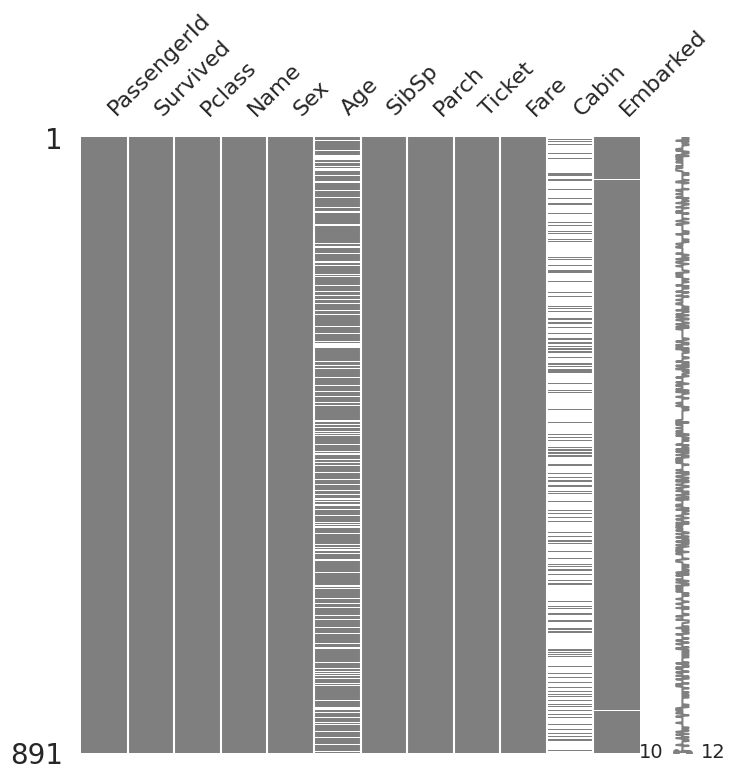

In [1130]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.5,0.5,0.5))
#iloc 원하는 컬럼 가져오기 

<Axes: >

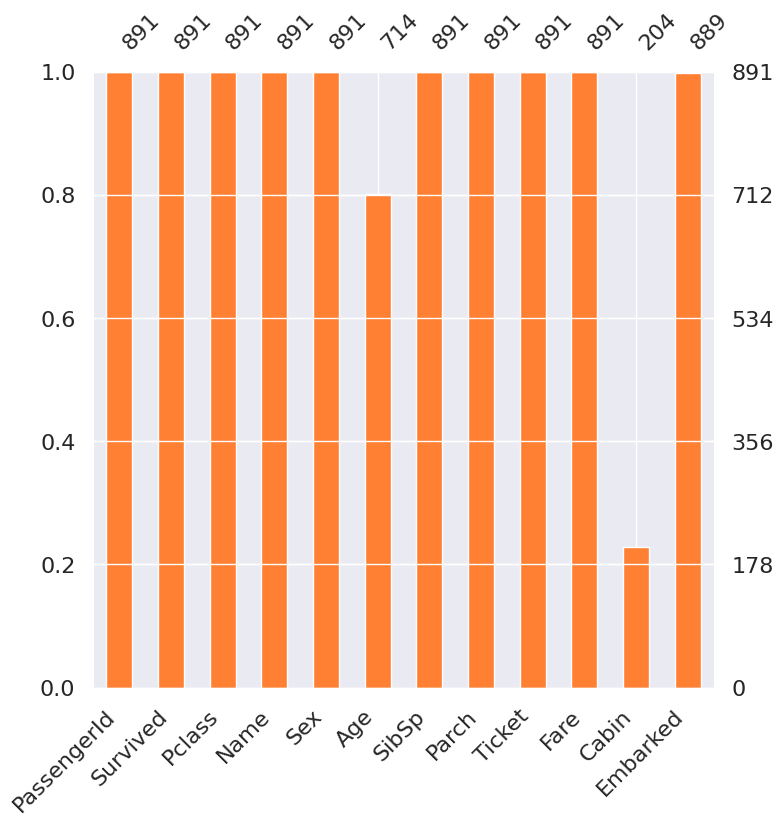

In [1131]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(1,0.5,0.2))

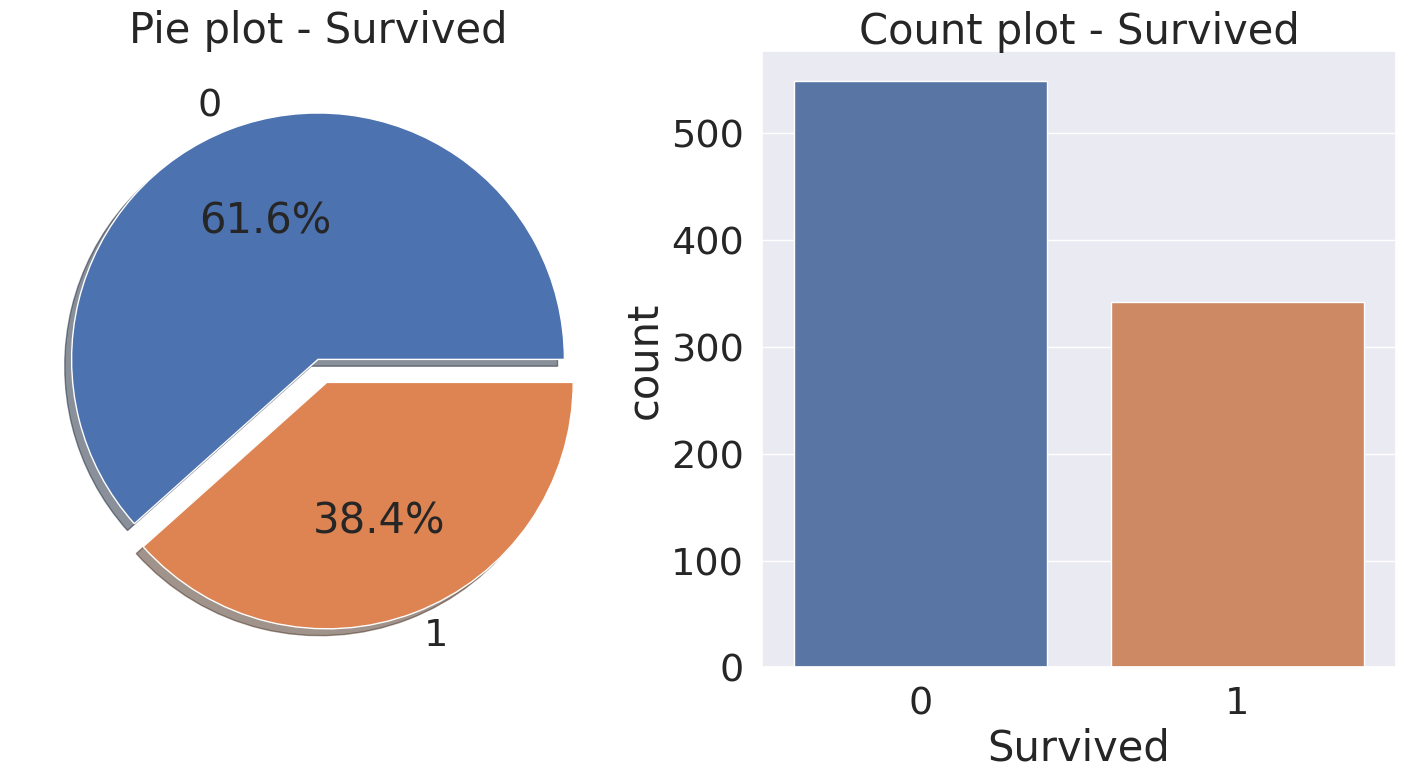

In [1132]:
#target label 확인
f,ax=plt.subplots(1,2,figsize=(18,8)) # 하나의 행에 두 개의 파트로 나눠진 그림 (1,2)
                                      # f는 전체, ax는 각각의 객체 조정가능
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df_train,ax=ax[1]) #ax=ax[1] 도화지에 2번째 그림 
ax[1].set_title('Count plot - Survived')
plt.show()

### 2.1 Pclass

In [1133]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [1134]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


<Axes: xlabel='Pclass'>

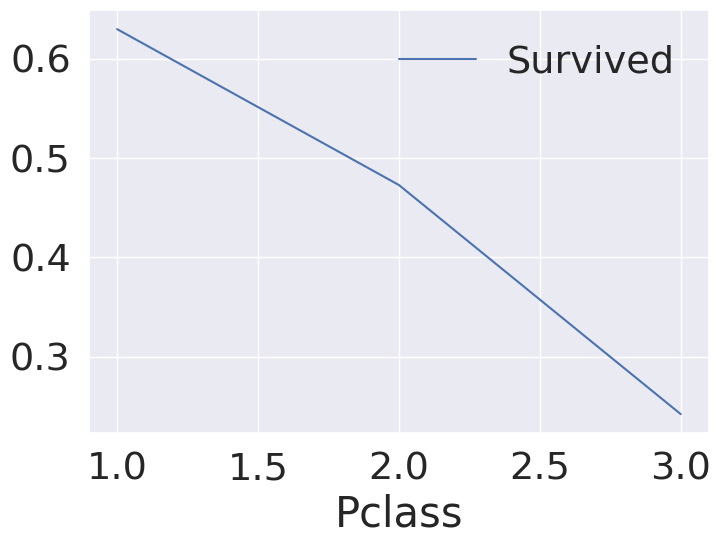

In [1135]:
#class 별 생존율 계산
#class가 높을수록 생존율이 높다 
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=True).plot()

<Axes: xlabel='Pclass'>

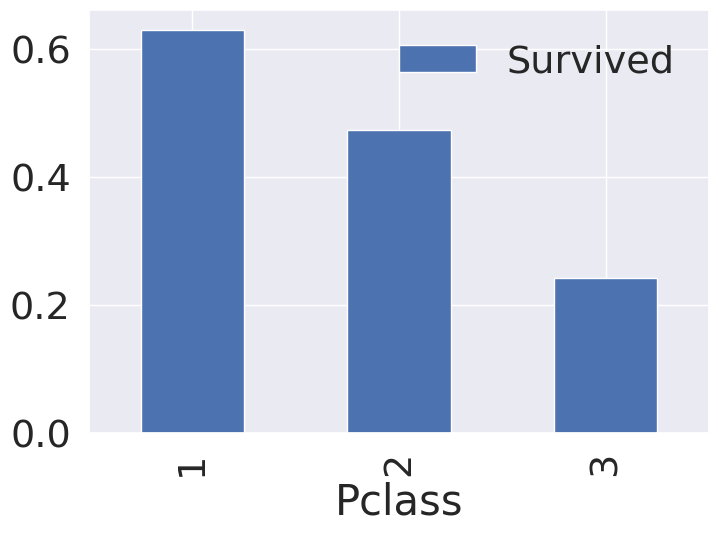

In [1136]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

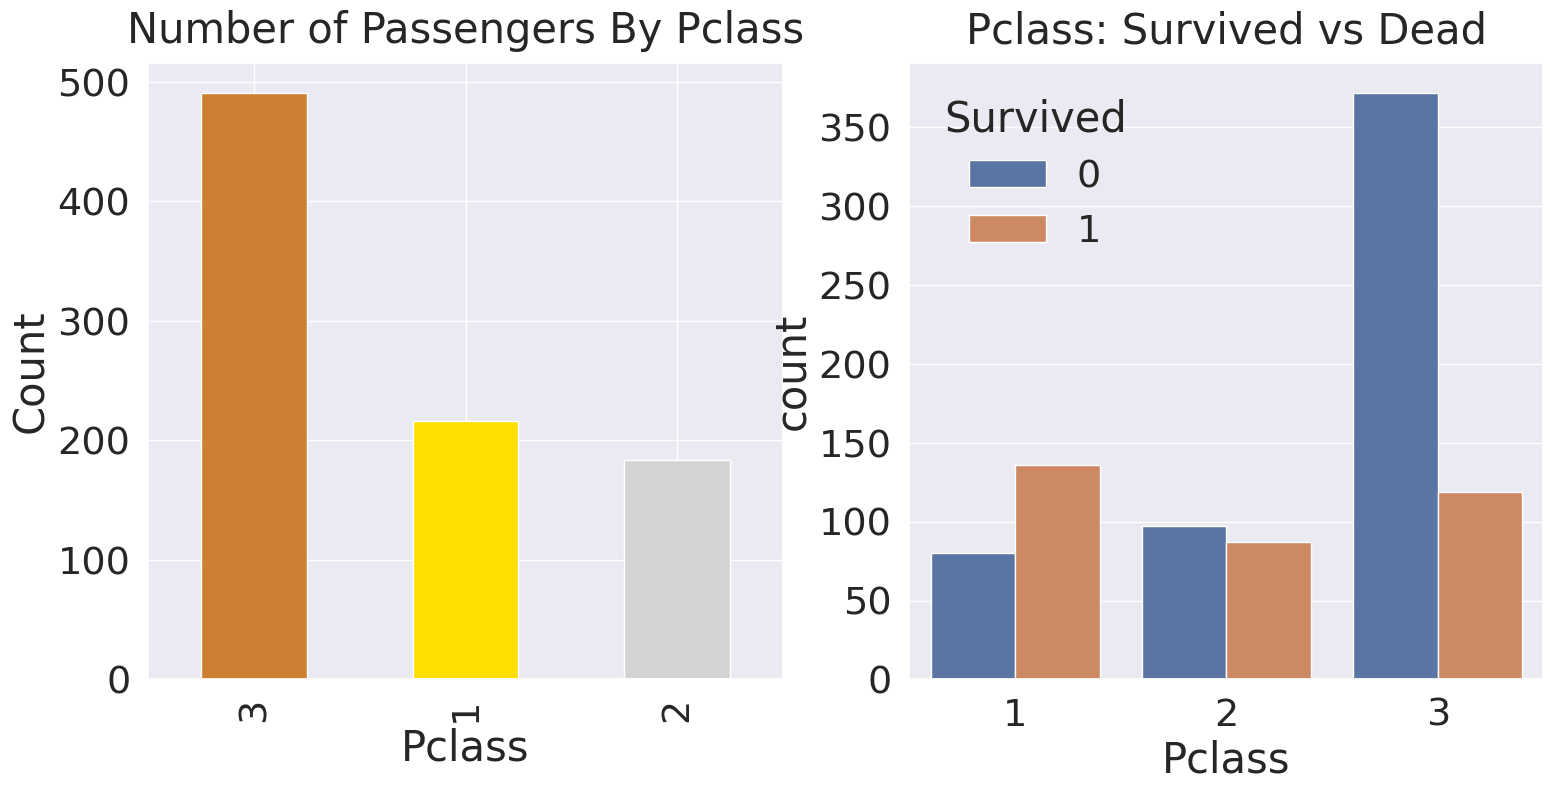

In [1137]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- class가 높을수록 생존확률이 높은 걸 확인할 수 있음.
- 생존에 pclass가 큰 영향을 미친다고 생각해 볼 수 있음.=> 나중에 모델링 시 이 feature를 사용하는 것이 좋을 거라 판단됨.

### 2.2 Sex

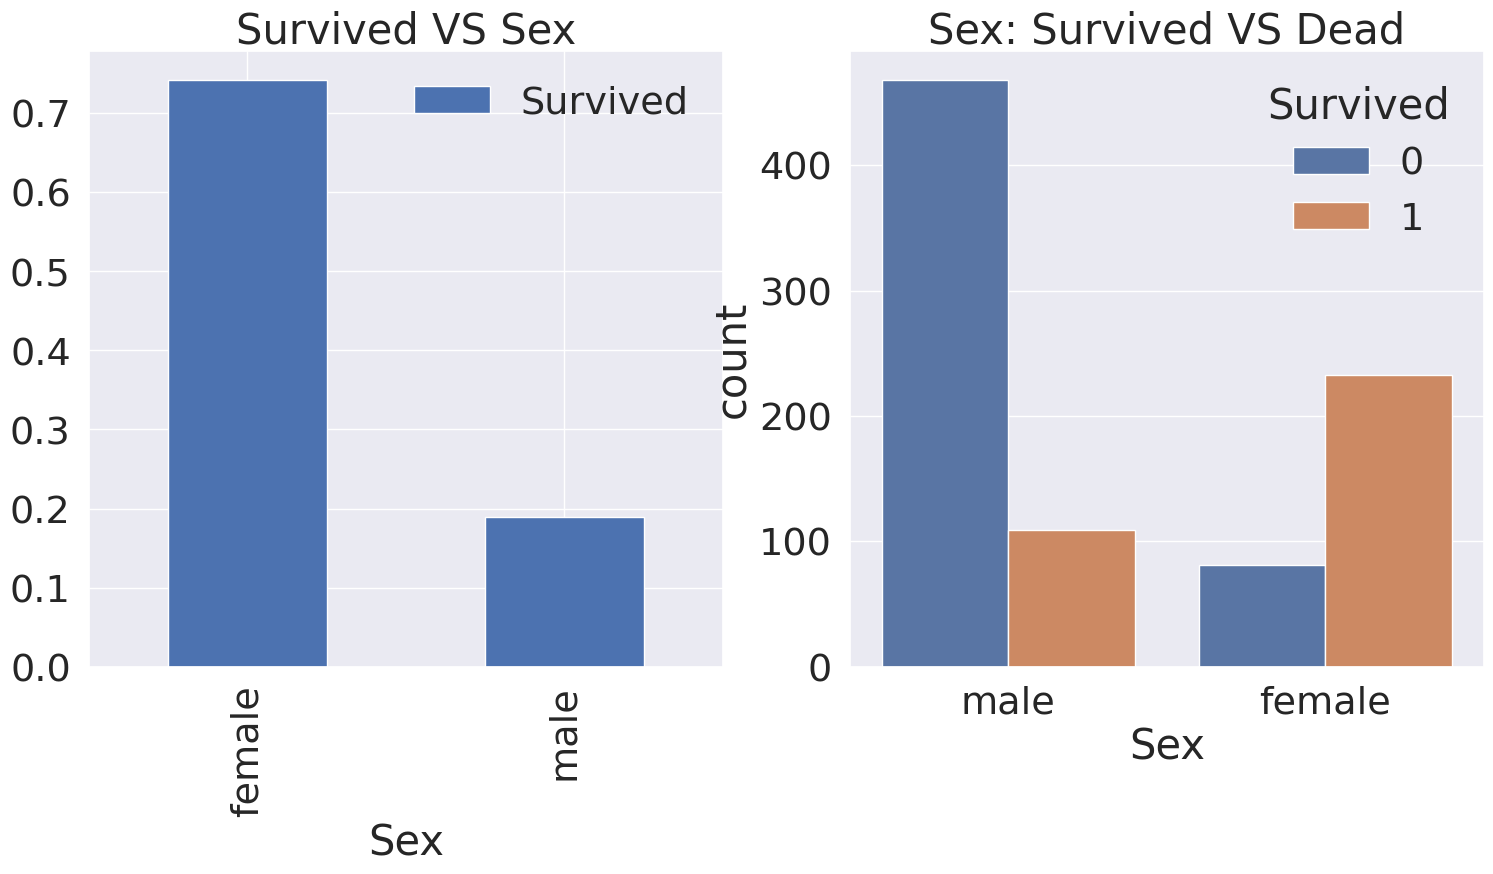

In [1138]:
f,ax= plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot(x='Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived VS Dead')
plt.show()

In [1139]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1140]:
pd.crosstab(df_train["Sex"],df_train['Survived'],margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.2 Both Sex and Pclass

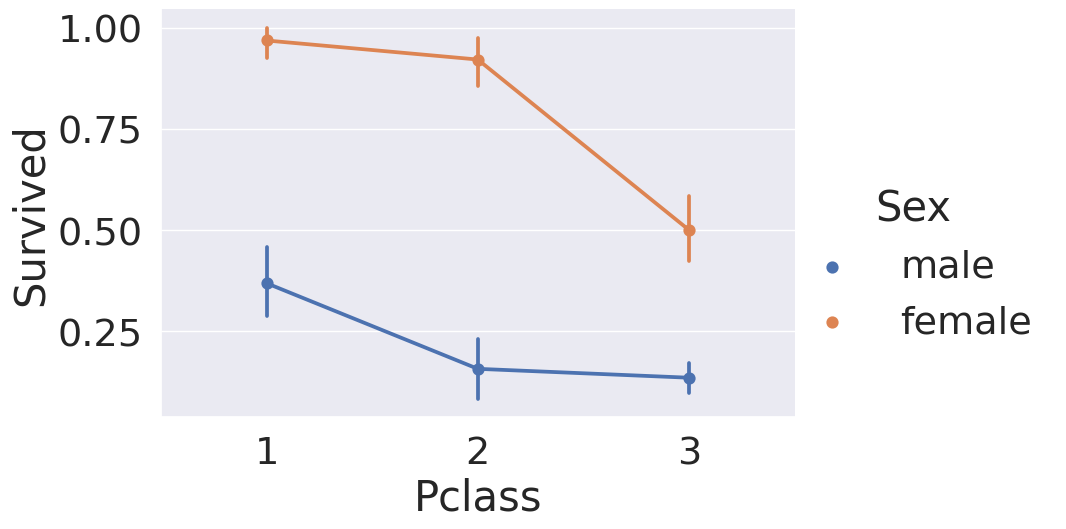

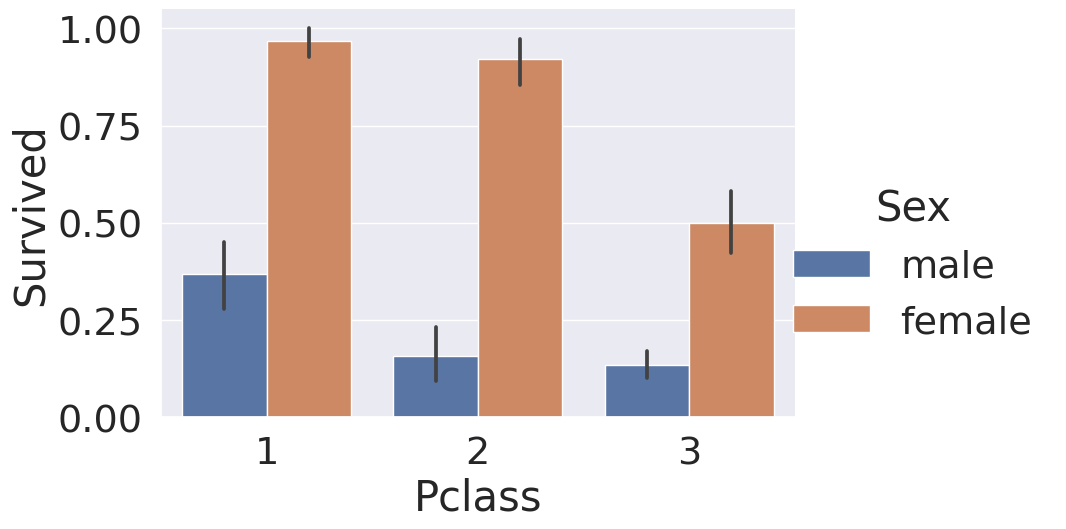

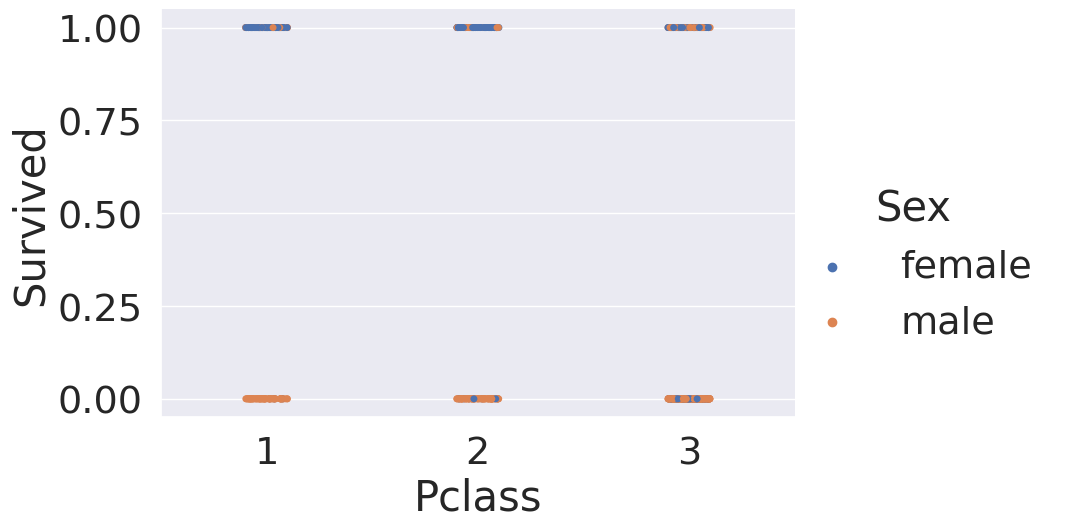

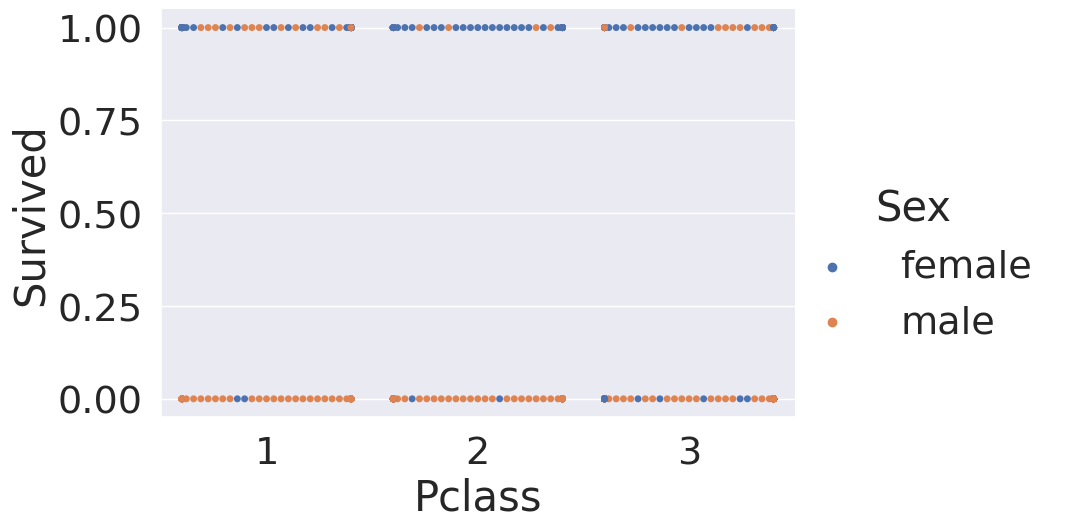

In [1141]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, height=6, aspect=1.5, kind='point')
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, height=6, aspect=1.5, kind='bar')
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, height=6, aspect=1.5, kind='strip')
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, height=6, aspect=1.5, kind='swarm')
#factorplot -> catplot으로 바뀜 + kind 추가 필요 

- lady first & money brings survival ??

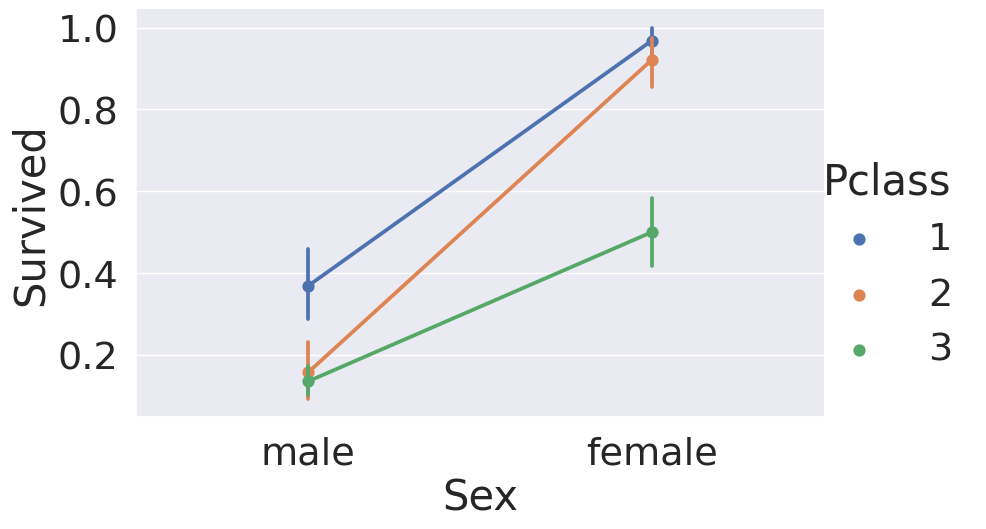

In [1142]:
sns.catplot(x='Sex',y='Survived',hue="Pclass",data=df_train,height=6,aspect=1.5,kind='point')
#에러바: 표본의 오차 범위가 작을 수록 신뢰성 up 

### Age

In [1143]:
print('제일 나이가 많은 탑승객 :{:.1f}years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 :{:.1f}years'.format(df_train['Age'].max()))
print('탑승객 평균 나이 :{:.1f}years'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 :80.0years
제일 어린 탑승객 :80.0years
탑승객 평균 나이 :29.7years


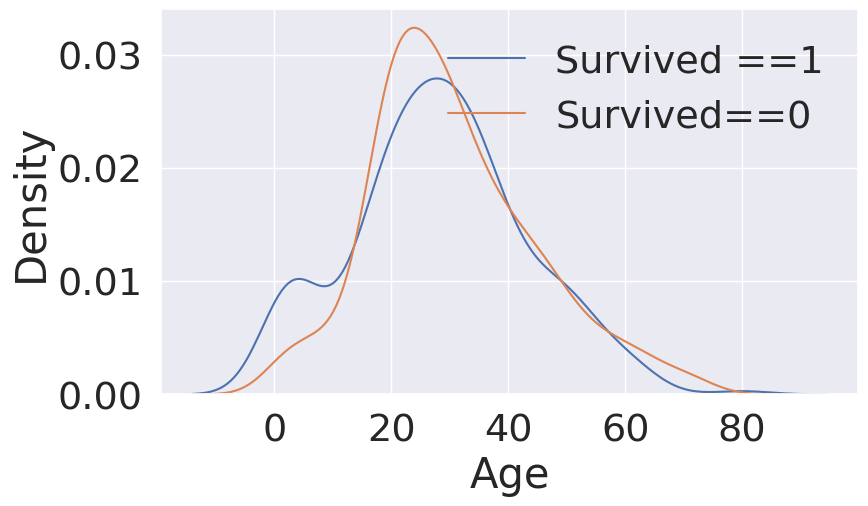

In [1144]:
#나이에 따른 생존 확률 
fig,ax = plt.subplots(1,1,figsize=(9,5)) 
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax) #데이터들의 분포 추적 
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax) #히스토그램을 밀도 함수로 표현  #커널밀도 추정 
plt.legend(['Survived ==1','Survived==0'])
plt.show()

### 도화지를 준비하는 3가지 방법
- f=plt.figure(gifsize=(10,10)) 

- f,ax=plt.subplots(1,1,figsize=(10,110)

- plt.figure(fisize=(10,10))

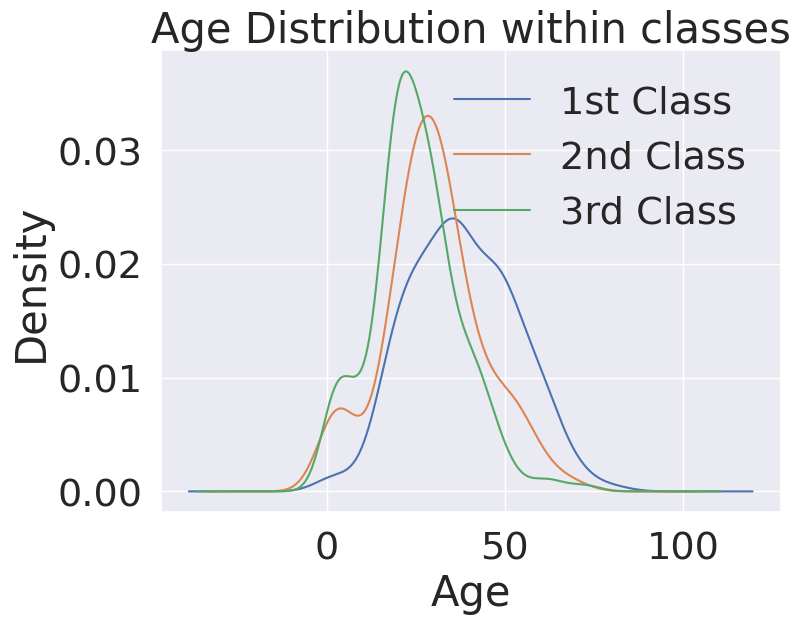

In [1145]:
# 생존 확률은 x #나이에 따른 class 분포 
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

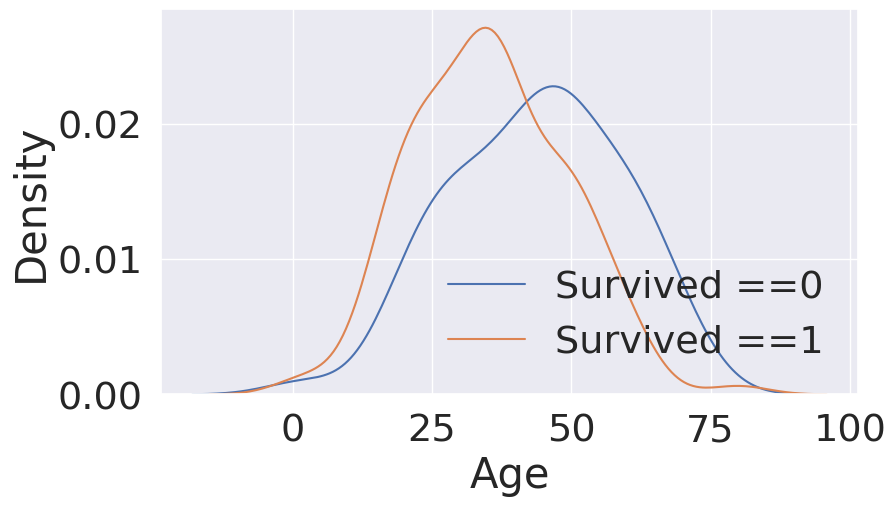

In [1146]:
# class 1 나이대별 생존률 비교 
f,ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'], ax=ax)

plt.legend(['Survived ==0','Survived ==1'])
plt.show()

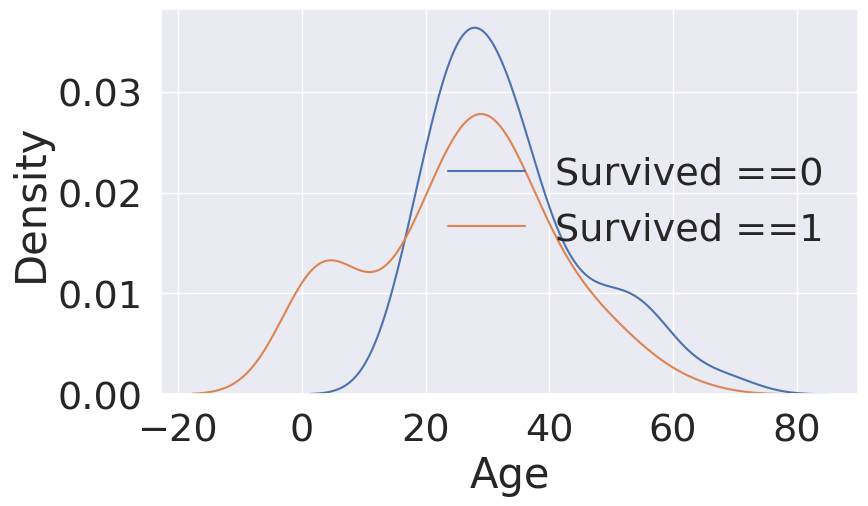

In [1147]:
# class 2 나이대별 생존률 비교 
f,ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], ax=ax)

plt.legend(['Survived ==0','Survived ==1'])
plt.show()

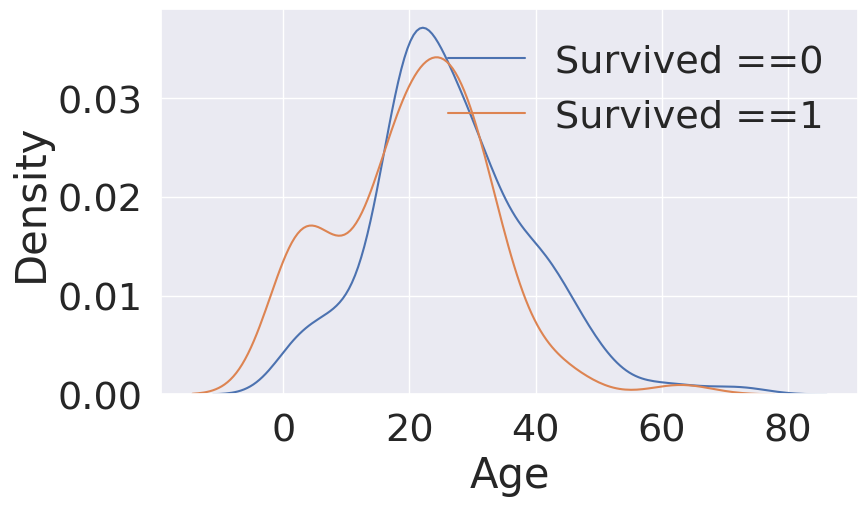

In [1148]:
# class 3 나이대별 생존률 비교 
f,ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'], ax=ax)

plt.legend(['Survived ==0','Survived ==1'])
plt.show()

In [1149]:
i=10
df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived'])

0.6129032258064516

In [1150]:
df_train[df_train['Age']<i]['Survived'].sum()

38

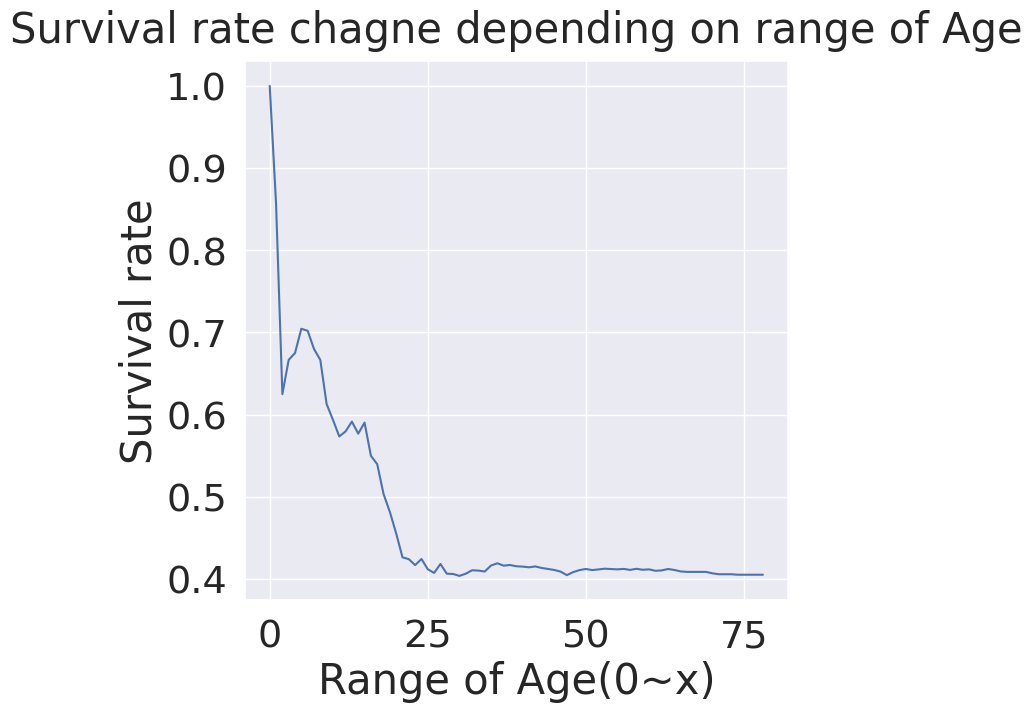

In [1151]:
# 나이에 따른 생존율 분석 
change_age_range_survival_ratio=[]

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7)) 
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate chagne depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()
    
    

### pclass,Sex,Age

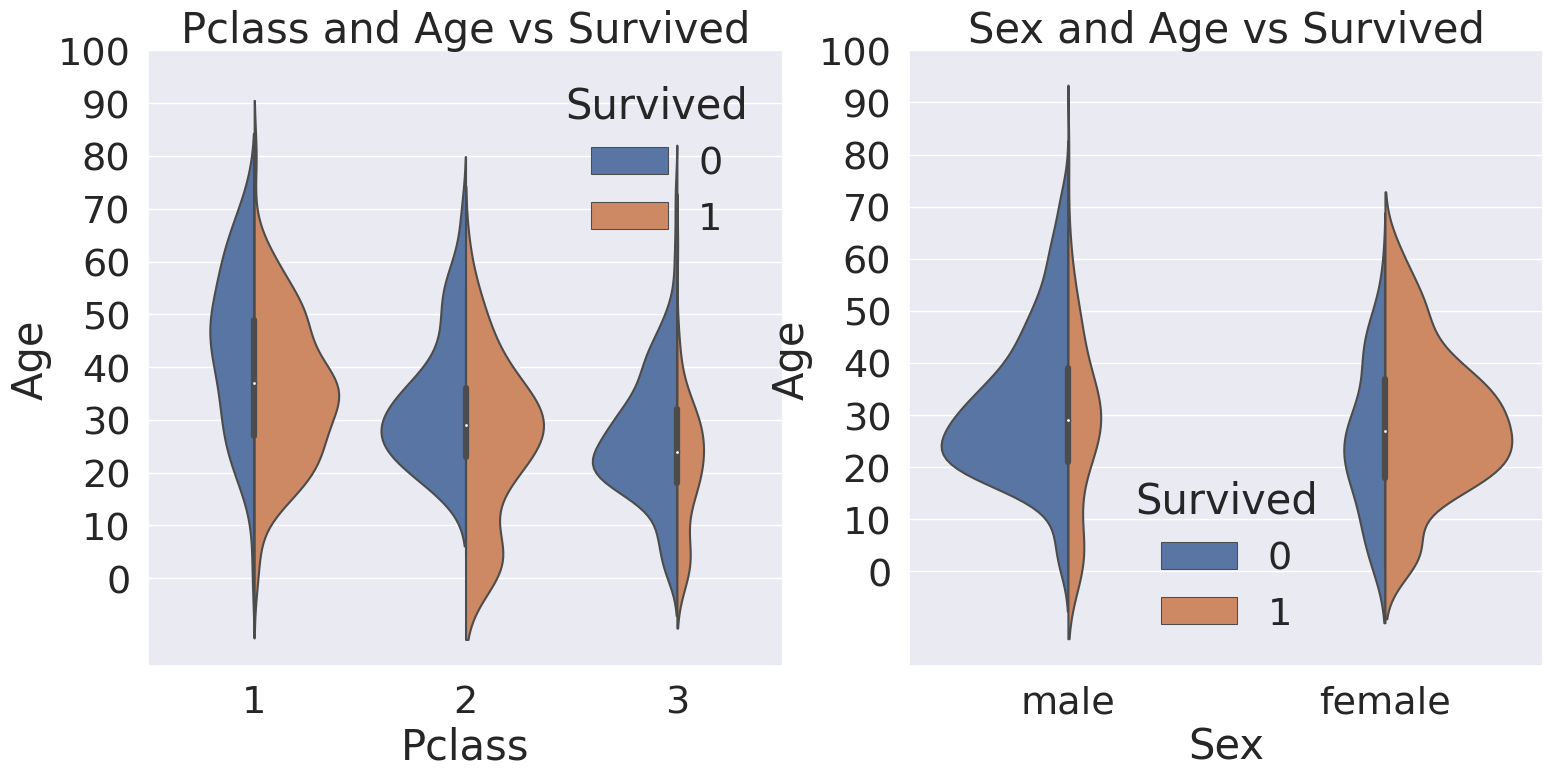

In [1152]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
#violin 모양을 닮아서 violinplot
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()


### Embarked

In [1153]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False)#내림차순 

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [1154]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: xlabel='Embarked'>

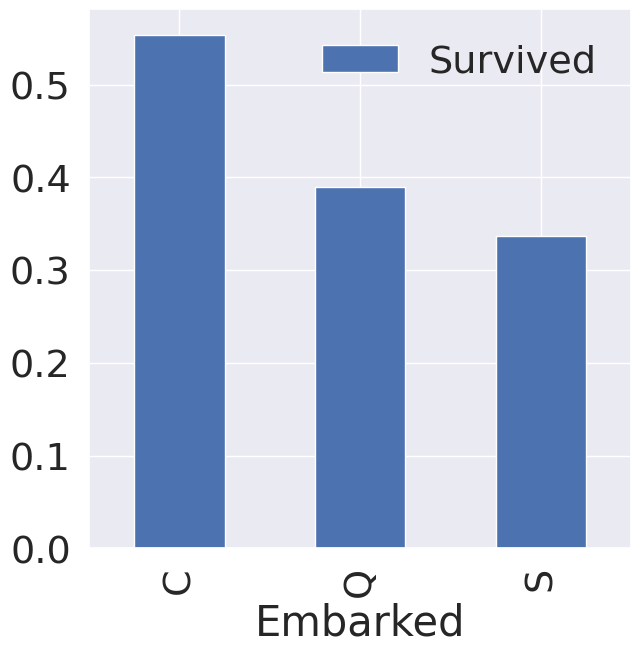

In [1155]:
f,ax=plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

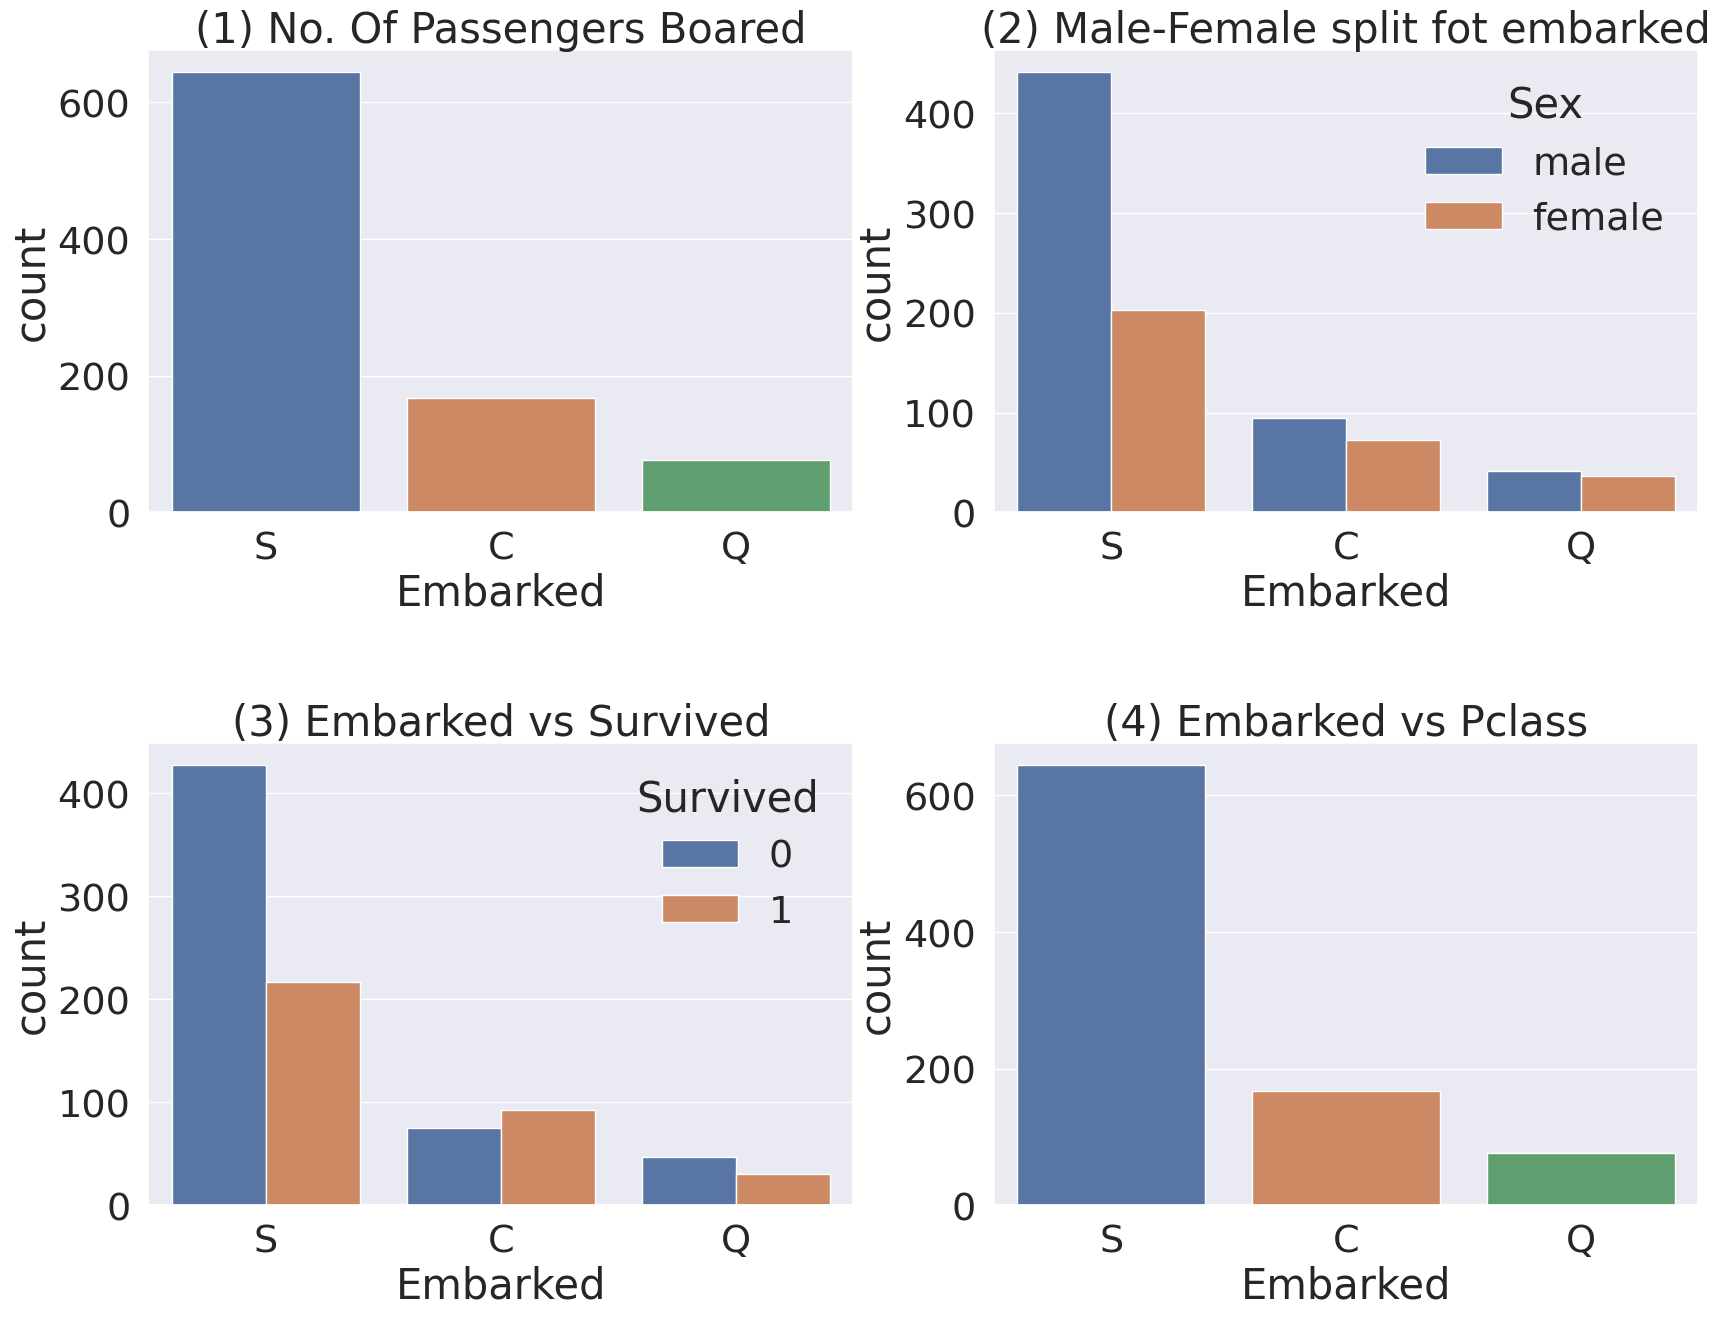

In [1156]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot(x='Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split fot embarked')

sns.countplot(x='Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


### Family- SibSp(형제,자매) + Parch(부모,자녀)

In [1157]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [1158]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


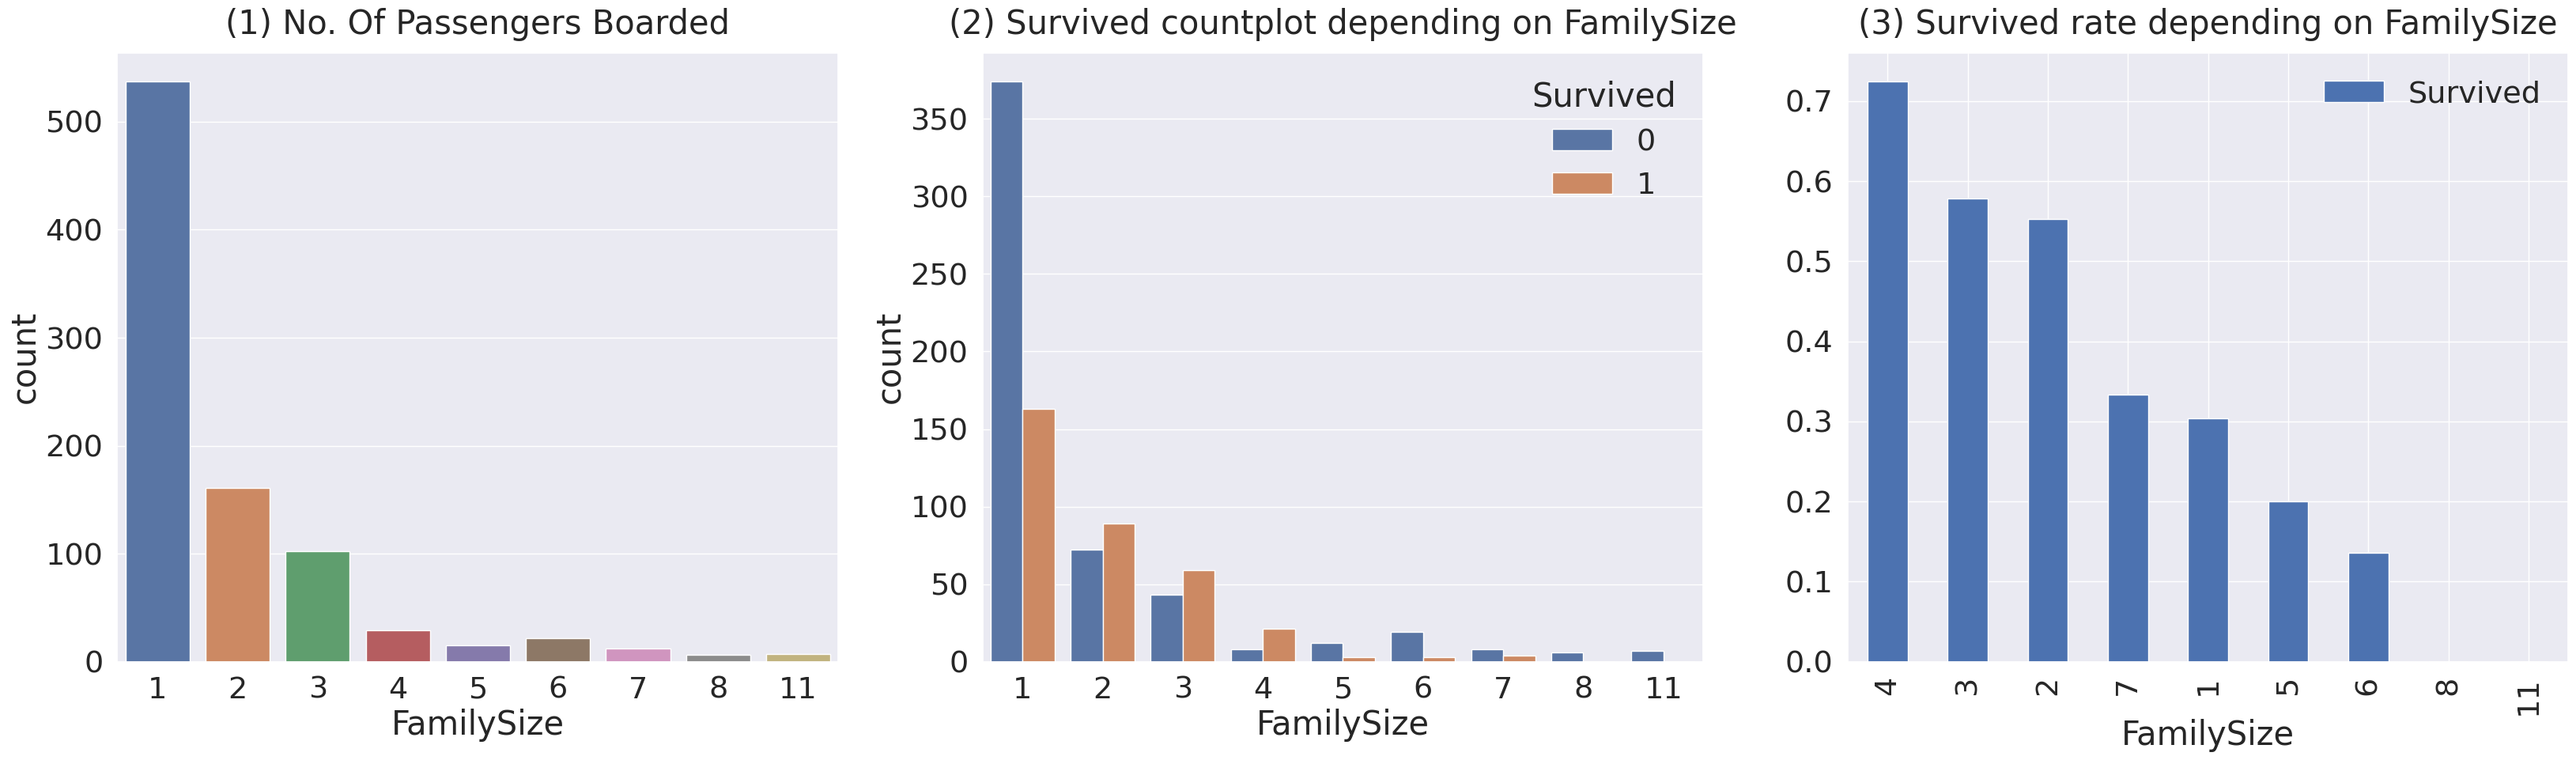

In [1159]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02) # y=1.02는 제목의 위치를 그래프의 위쪽으로 약간 끌어올린다

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


### Fare
- Fare 는 탑승요금이며, Continuous feature 

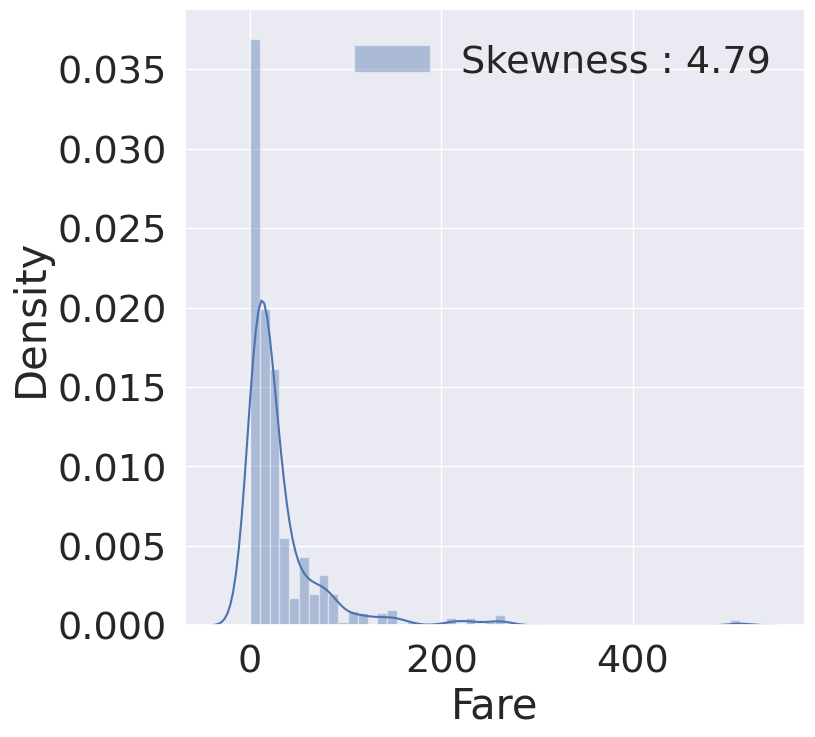

In [1160]:
#skewness: 왜도
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best') 

In [1161]:
#feature engineering with log: 모델 성능 향상 
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
#'Fare'의 값이 0보다 크다면 로그 값을 취하고, 그렇지 않다면 0을 반환
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
#'Fare'의 값이 0보다 크다면 로그 값을 취하고, 그렇지 않다면 0을 반환

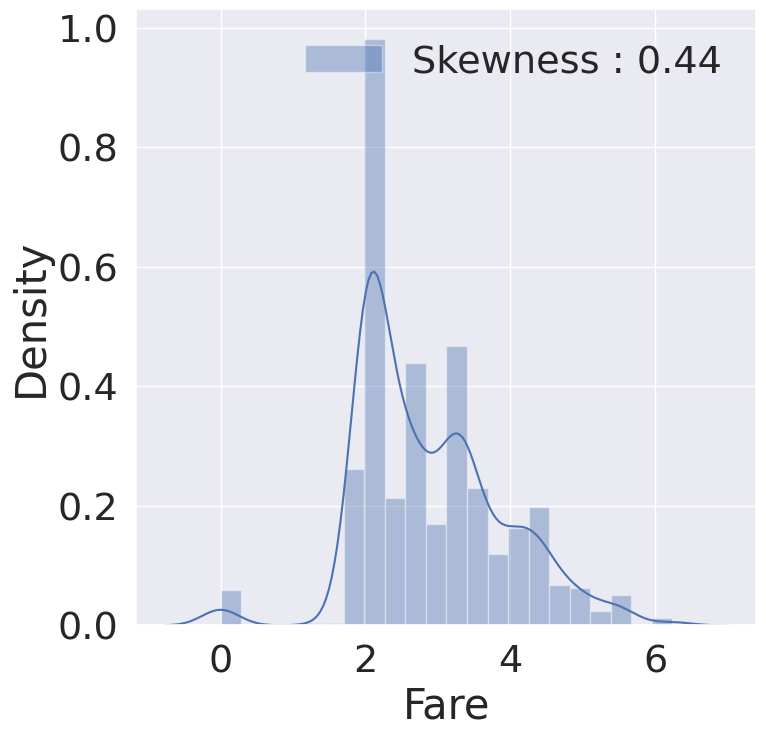

In [1162]:

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있다.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
- a.k.a feature engineering 

### cabin

- 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 어렵.
- 때문에, 모델에 포함시키지 않을 예정.

In [1163]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### Ticket
- 이 feature 는 NaN 은 없dma. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용 가능 

In [1164]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

- ticket number 는 매우 다양합니다. 우리는 여기서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을까요?
- feature로 사용하려면 새로운 아이디어 필요 
- 일단,ticket 은 넘기고 추후에 모델 성능을 향상시키기 위해 ticket 에서 정보를 이끌어내보자.

### 3. Fill NULL
#### 3.1.1 Fill Null in Age using title

In [1165]:
df_train['Age'].isnull().value_counts()#or .sum() 177개의 null  값 존재 확인 

Age
False    714
True     177
Name: count, dtype: int64

In [1166]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [1167]:
df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

,0
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs
...,...
413,Mr
414,Dona
415,Mr
416,Mr


In [1168]:
df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,S,3,Mrs


In [1169]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [1170]:
#특정값을 다른 값으로 변경 어차피 남자 여자니깐

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)


In [1171]:

df_train.groupby('Initial')[['PassengerId','Survived','Pclass','Age','SibSp','Parch', 'Fare','FamilySize']].mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

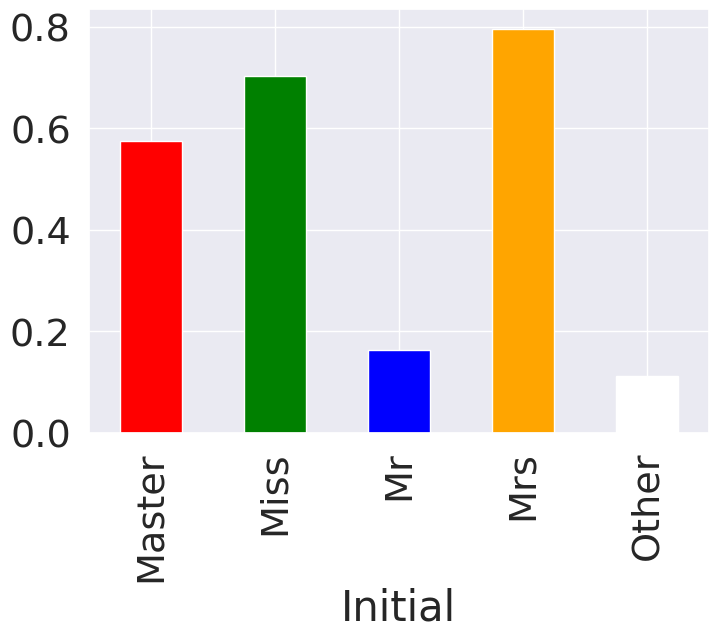

In [1172]:
colors = ['red', 'green', 'blue','orange','white']  # 색상 리스트
df_train.groupby('Initial')['Survived'].mean().plot.bar(color=colors)

- 이제 본격적으로 Null 을 채울 것입니다. null data 를 채우는 방법은 정말 많이 존재. statistics 를 활용하는 방법도 있고, null data 가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있음. 여기서는 statistics 를 활용하는 방법을 사용.

- 여기서 statistics 는 train data 의 것을 의미. test 를 unseen 으로 둔 상태로 놔둬야 하며, train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야함.

In [1173]:
df_all = pd.concat([df_train, df_test])

In [1174]:
df_all.groupby('Initial')[['PassengerId','Survived','Pclass','Age','SibSp','Parch', 'Fare','FamilySize']].mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,3.262225,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,3.065227,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,2.680701,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,3.488188,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,2.951897,1.384615


In [1175]:
#Age의 평균을 이용해 Null value 채우기

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 37
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 45

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 37
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 45

### 3.1.2 Fill Null in Embarked

In [1176]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')


Embarked has  2  Null values


- Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로, 간단하게 Null 을 S로 채우자.
- dataframe 의 fillna method 를 이용하면 쉽게 채울 수 있습니다. 여기서 inplace=True 로 하면 df_train 에 fillna 를 실제로 적용

In [1177]:
df_train['Embarked'].fillna('S',inplace=True)
df_train['Embarked'].isnull().sum()

0

### 3.2 Change Age(continuous to categorical)

- Age 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만, Age 를 몇개의 group 으로 나누어 category 화 시켜줄 수 도 있습니다. continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만, 본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.

- 방법은 여러가지가 있습니다. dataframe 의 indexing 방법인 loc 를 사용하여 직접해줄 수 있고, 아니면 apply 를 사용해 함수를 넣어줄 수 있습니다.


In [1178]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### 3.3 Change Initial, Embarked and Sex (string to numerical)

- 현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있습니다. 이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 합니다.

- map method 를 가지고 간단히 할 수 있습니다.

- 사전 순서대로 정리하여 mapping 하겠습니다

In [1179]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [1180]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

- 이제 각 feature 간의 상관관계를 한번 보려고 합니다. 두 변수간의 Pearson correlation 을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없다는 것을 의미합니다. 구하는 수식은 아래와 같습니다.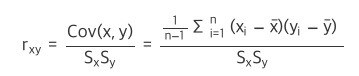

- 우리는 여러 feature 를 가지고 있으니 이를 하나의 maxtrix 형태로 보면 편할 텐데, 이를 heatmap plot 이라고 하며, dataframe 의 corr() 메소드와 seaborn 을 가지고 편하게 그릴 수 있습니다.

### 3.4 One-hot encoding on Initial and Embarked

- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
- 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말합니다.
- pandas 의 get_dummies 를 사용하여 쉽게 해결 할 수 있습니다.
- 총 5개의 카테고리니, one-hot encoding 을 하고 나면 새로운 5개의 column 이 생겨납니다.
- Initial 을 prefix로 두어서 구분이 쉽게 만들줌

In [1181]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')


In [1182]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,S,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,C,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,S,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,S,1,3,False,False,True,False,False


- 보시다시피 오른쪽에 우리가 만들려고 했던 one-hot encoded columns 가 생성된 것이 보입니다
- Embarked 에도 적용하겠습니다. Initial 때와 마찬가지로 one-hot encoding 을 사용해 표현하겠습니다.

In [1183]:

df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')


### 3.5 Drop columns(필요한 컬럼들만 남기고 다 삭제)

In [1184]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train.head()

#보시다시피, train 의 Survived feature(target class)를 빼면 train, test 둘다 같은 columns 를 가진 걸 확인할 수 있습니다.

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,38.0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,26.0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,35.0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,35.0,2.085672,1,3,False,False,True,False,False,False,False,True


In [1185]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,2.057860,1,False,False,True,False,False,False,True,False
1,3,0,47.0,1.945910,2,False,False,False,True,False,False,False,True
2,2,1,62.0,2.270836,1,False,False,True,False,False,False,True,False
3,3,1,27.0,2.159003,1,False,False,True,False,False,False,False,True
4,3,0,22.0,2.508582,3,False,False,False,True,False,False,False,True


### 4. Building machine learning model and prediction using the trained model

- 이제 준비가 다 되었으니 sklearn 을 사용해 본격적으로 머신러닝 모델을 만들어 봅시다.

In [1186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

- 지금 타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary) binary classfication 문제입니다.
- 우리가 지금 가지고 있는 train set 의 survived를 제외한 input 을 가지고 모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어 냅니다.
- 그 후 모델이 학습하지 않았던 test set 을 input 으로 주어서 test set 의 각 샘플(탑승객)의 생존 유무를 예측해봅니다.

In [1187]:
X_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values 

In [1188]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

- sklearn 에서는 여러 머신러닝 알고리즘을 지원해줍니다. 열거하기엔 너무 많으므로, 직접 documentation에 들어가 보시길 추천합니다. http://scikit-learn.org/stable/supervised_learning.html#supervised-learning 여기에 들어가시면 지원되는 알고리즘 수에 놀라실 겁니다.
- 본 튜토리얼에서는 랜덤포레스트 모델을 사용하도록 하겠습니다.
- 랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델입니다. 더 구체적인 모델 설명은 여러 블로그들 참고하시면 될 것이고, 저도 한번 추후 다뤄보겠습니다.
- 각 머신러닝 알고리즘에는 여러 파라미터들이 있습니다. 랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf 등 여러 파라미터들이 존재합니다. 이것들이 어떻게 세팅되냐에 따라 같은 데이터셋이라 하더라도 모델의 성능이 달라집니다.
- 파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요합니다. 결국 많이 써봐야 모델도 잘 세울 수 있는 것이죠. 그래서 캐글을 추천합니다. 여러 데이터셋을 가지고 모델을 이리저리 써봐야 튜닝하는 감이 생길테니까요!
- 일단 지금은 튜토리얼이니 파라미터 튜닝은 잠시 제쳐두기로 하고, 기본 default 세팅으로 진행하겠습니다.
- 모델 객체를 만들고, fit 메소드로 학습시킵니다.
- 그런 후 valid set input 을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부)를 얻습니다.

In [1189]:
X_tr_df = pd.DataFrame(X_tr, columns=['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Age_cat_2', 'Initial_0', 'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
X_tr_df['Sex'] = X_tr_df['Sex'].replace({'male': 1, 'female': 0})


In [1190]:
model = RandomForestClassifier()
model.fit(X_tr_df, y_tr)


RandomForestClassifier()

### 4.2 Model generation and prediction

#### 1) RandomForest

In [1191]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

# # 단 세줄만으로 여러분은 모델을 세우고, 예측까지 해봤습니다.
# # 자, 이제 모델의 성능을 한번 살펴보겠습니다.

In [1192]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 84.33% 정확도로 생존을 맞춤


### 아무 파라미터 튜닝 하지 않아도 83.96%가 나왔음.
### 성별만으로 했을 때는 maybe 78%

#### 2) SVC

In [1193]:
# from sklearn.svm import SVC

# model= SVC()
# model.fit(X_tr, y_tr)
# prediction = model.predict(X_vld)
# print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

#### 3) logistic regression

In [1194]:
# from sklearn.linear_model import LogisticRegression

# model1 = LogisticRegression()
# model1.fit(X_tr, y_tr)
# prediction = model1.predict(X_vld)
# print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

### 로지스틱 회귀가 정확도 가장 높게 나왔음.

#### 4) KNN

In [1195]:
# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors = 3)
# model.fit(X_tr, y_tr)
# prediction = model.predict(X_vld)
# print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

#### 5) Decison Tree

In [1196]:
# from sklearn.tree import DecisionTreeClassifier

# model= DecisionTreeClassifier()
# model.fit(X_tr, y_tr)
# prediction = model.predict(X_vld)
# print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

### 4.3 Feature importance 

- 학습된 모델은 feature importance 를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.
- 쉽게 말해, 10 = 4x1 + 2x2 + 1*x3 을 생각하면, 우리는 x1이 결과값(10)에 큰 영향을 준다고 생각 할 수 있습니다. feature importance 는 4, 2, 1 을 이야기하며, x1이 가장 큰 값(4)를 가지므로, 이 모델에 가장 큰 영향을 미친다고 말할 수 있습니다.
- 학습된 모델은 기본적으로 featureimportances 를 가지고 있어서 쉽게 그 수치를 얻을 수 있습니다.
- pandas series 를 이용하면 쉽게 sorting 을 하여 그래프를 그릴 수 있습니다.
- 특성 중요도는 주로 트리 기반 모델 (예: Decision Trees, Random Forests, Gradient Boosting Trees)에서 계산됩니다. Logistic Regression과 같은 선형 모델은 계수(coefficient)를 통해 각 특성의 영향을 나타내므로, 특성 중요도를 제공하지 않습니다.

In [1197]:
# # 로지스틱회귀 계수 중요도 파악 
# # 계수 (coefficient) 확인
# coefficients = model1.coef_[0]  # 모델의 계수 배열

# # 특성 이름을 따로 가지고 있다고 가정 (리스트 또는 배열 형태)
# feature_names = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Age_cat_2', 'Initial_0', 'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_C', 'Embarked_Q', 'Embarked_S']  # 특성 이름들을 적절하게 지정

# # 특성별 계수와 이름을 DataFrame으로 만듦
# coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# # 계수의 절댓값을 기준으로 내림차순 정렬
# coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# # 결과 출력
# print(coef_df)


In [1198]:
# from pandas import Series

# feature_importance = model.feature_importances_
# Series_feat_imp = Series(feature_importance, index=df_test.columns)

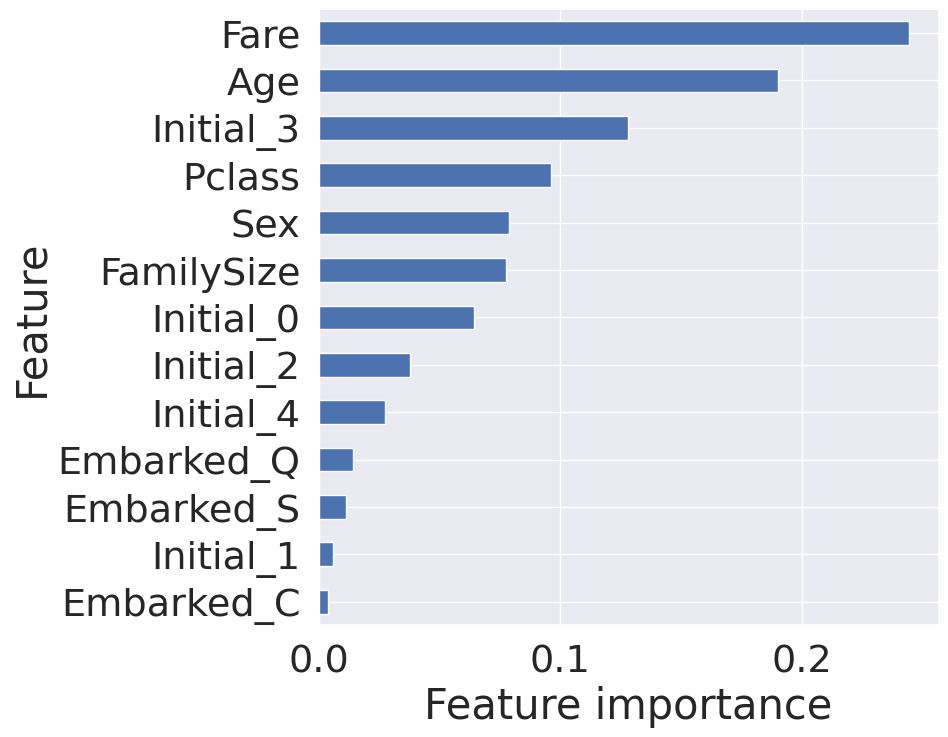

In [1199]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

### 4.4 Prediction on Test set

In [1200]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [1201]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


- 이제 testset 에 대하여 예측을 하고, 결과를 csv 파일로 저장해보겠습니다.